# **Comparación de Métodos numéricos para la solución de ODEs**
Métodos a comparar:
* Método de Euler
* Método del Trapezoide
* Método del punto medio
* Método de Runge-Kutta (orden 4)

Todos los métodos están implementados en este documento. Se exhiben dos ejemplos donde se aplican los diferentes métodos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Método de Euler
def euler(t, y0, f):
  y = np.zeros(len(t))
  y[0] = y0
  h = t[1] - t[0]
  for i in range(1, len(t)):
    y[i] = y[i-1] + h*f(t[i-1], y[i-1])
  return y

# Método del trapezoide
def trapezoide(t, y0, f):
  y = np.zeros(len(t))
  y[0] = y0
  h = t[1] - t[0]
  for i in range(1, len(y)):
    k = f(t[i-1], y[i-1])
    y[i] = y[i-1] + h/2*( k + f(t[i-1] + h, y[i-1] + h*k))
  return y

# Método del punto medio
def pMedio(t, y0, f):
  y = np.zeros(len(t))
  y[0] = y0
  h = t[1] - t[0]
  for i in range(1, len(t)):
    y[i] = y[i-1] + h*f(t[i-1] + h/2, y[i-1] + h/2*f(t[i-1], y[i-1]))
  return y

# Método de Heun
def heun(t, y0, f):
    y = np.zeros(len(t))
    y[0] = y0
    h = t[1] - t[0]
    for i in range(1, len(t)):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + h, y[i-1] + h*k1)
        y[i] = y[i-1] + (h/2) * (k1 + k2)
    return y

# Método de Runge-Kutta de orden 4
def RK4(t, y0, f):
  y = np.zeros(len(t))
  y[0] = y0
  h = t[1] - t[0]
  for i in range(1, len(t)):
    s1 = f(t[i-1], y[i-1])
    s2 = f(t[i-1] + h/2, y[i-1] + h/2*s1)
    s3 = f(t[i-1] + h/2, y[i-1] + h/2*s2)
    s4 = f(t[i-1] + h, y[i-1] + h*s3)
    y[i] = y[i-1] + h/6*(s1 + 2*s2+ 2*s3 + s4)
  return y

## Ecuación logística: Ejemplo 6.1
$$y' = cy(1-y) $$
Se consideraran varias condiciones iniciales detro del intervalo $[0,1]$.  

In [3]:
# Función
def f(x,y):
  return c*y*(1-y)

# Solución exacta
def exacta(t, y0, c):
  return 1 - 1/(1 + (y0/(1-y0))*np.exp(c*t))

In [4]:
# Limites de intervalos y tamaño de paso
t0 = 0
t1 = 1
N = 20
c = 1

# Condicciones iniciales
y_0 = np.linspace(0, 2, 8)
t = np.linspace(t0, t1, N)

In [5]:
# Soluciones numéricas
sol_euler = []
sol_trapezoide = []
sol_pMedio = []
sol_RK4 = []
for y0 in y_0:
  sol_euler.append(euler(t, y0, f))
  sol_trapezoide.append(trapezoide(t, y0, f))
  sol_pMedio.append(pMedio(t, y0, f))
  sol_RK4.append(RK4(t, y0, f))

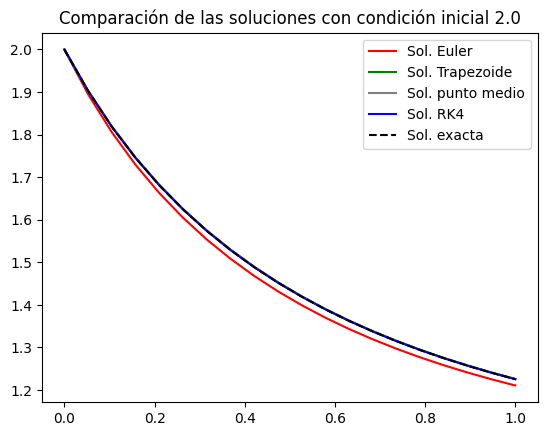

In [6]:
n = 7 # Cambio de condición inicial

# Gráfica de las soluciones numéricas
plt.plot(t, sol_euler[n], color = 'red', label = 'Sol. Euler')
plt.plot(t, sol_trapezoide[n], color = 'green', label ='Sol. Trapezoide')
plt.plot(t, sol_pMedio[n], color = 'gray', label = 'Sol. punto medio')
plt.plot(t, sol_RK4[n], color = 'blue', label = 'Sol. RK4')

# Solución analítica
plt.plot(t, exacta(t, y_0[n], c), color = 'black', linestyle = '--', label = 'Sol. exacta')

plt.title("Comparación de las soluciones con condición inicial " + str(y_0[n]))
plt.legend()
plt.show()

### Error global

In [7]:
sol =  exacta(t, y_0[n], c)
err_euler = np.log(np.abs(sol - sol_euler))
err_trap = np.log(np.abs(sol - sol_trapezoide))
err_pM = np.log(np.abs(sol - sol_pMedio))
err_RK4 = np.log(np.abs(sol - sol_RK4))

/tmp/ipython-input-2277276656.py:2: RuntimeWarning: divide by zero encountered in log
  err_euler = np.log(np.abs(sol - sol_euler))
/tmp/ipython-input-2277276656.py:3: RuntimeWarning: divide by zero encountered in log
  err_trap = np.log(np.abs(sol - sol_trapezoide))
/tmp/ipython-input-2277276656.py:4: RuntimeWarning: divide by zero encountered in log
  err_pM = np.log(np.abs(sol - sol_pMedio))
/tmp/ipython-input-2277276656.py:5: RuntimeWarning: divide by zero encountered in log
  err_RK4 = np.log(np.abs(sol - sol_RK4))


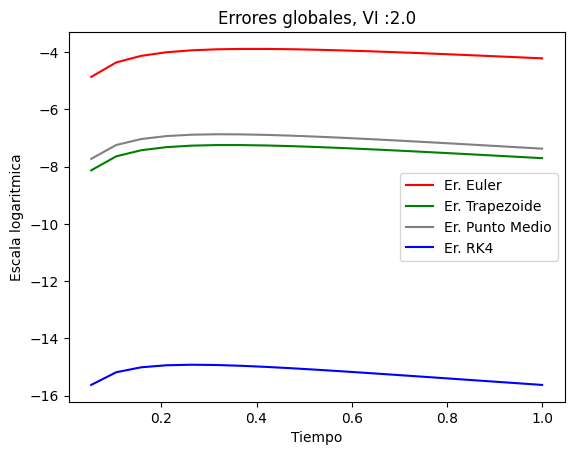

In [8]:
n = 7
plt.plot(t, err_euler[n], color = 'red', label = 'Er. Euler')
plt.plot(t, err_trap[n], color = 'green', label ='Er. Trapezoide')
plt.plot(t, err_pM[n], color = 'gray', label = 'Er. Punto Medio')
plt.plot(t, err_RK4[n], color = 'blue', label = 'Er. RK4')

plt.title("Errores globales, VI :" + str(y_0[n]))
plt.ylabel("Escala logaritmica")
plt.xlabel("Tiempo")
plt.legend()
plt.show()

## Ejemplo base
En el Sauer el ejemplo base es la ODE
$$ y' = yt + t^3 $$
se considera la condicción inicial $y(0) = 1$ y la solución dentro del intervalo $[0,1]$.

In [9]:
# Función
def g(x,y):
  return y*x + x**3

# Solución exacta
def exacta_g(t, y0):
  return 3*np.exp(t**2/2)- t**2 -2

In [10]:
# Limites de intervalos y tamaño de paso
t0 = 0
t1 = 1
N = 12

# Condicciones iniciales
y0 = np.array(1)
t = np.linspace(t0, t1, N)

In [11]:
# Soluciones numéricas
sol_euler = euler(t, y0, g)
sol_trapezoide = trapezoide(t, y0, g)
sol_pMedio = pMedio(t, y0, g)
sol_RK4 = RK4(t, y0, g)

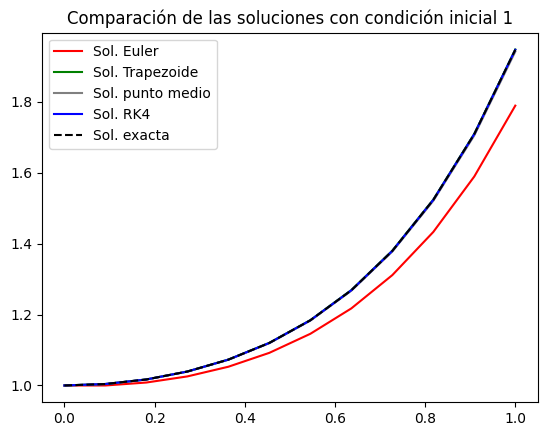

In [12]:
plt.plot(t, sol_euler, color = 'red', label = 'Sol. Euler')
plt.plot(t, sol_trapezoide, color = 'green', label ='Sol. Trapezoide')
plt.plot(t, sol_pMedio, color = 'gray', label = 'Sol. punto medio')
plt.plot(t, sol_RK4, color = 'blue', label = 'Sol. RK4')

# Solución analítica
plt.plot(t, exacta_g(t, y0), color = 'black', linestyle = '--', label = 'Sol. exacta')

plt.title("Comparación de las soluciones con condición inicial " + str(y0))
plt.legend()
plt.show()

### Error global

In [13]:
sol = exacta_g(t, y0)
err_euler = np.log(np.abs(sol - sol_euler))
err_trap = np.log(np.abs(sol - sol_trapezoide))
err_pM = np.log(np.abs(sol - sol_pMedio))
err_RK4 = np.log(np.abs(sol - sol_RK4))

/tmp/ipython-input-3627455869.py:2: RuntimeWarning: divide by zero encountered in log
  err_euler = np.log(np.abs(sol - sol_euler))
/tmp/ipython-input-3627455869.py:3: RuntimeWarning: divide by zero encountered in log
  err_trap = np.log(np.abs(sol - sol_trapezoide))
/tmp/ipython-input-3627455869.py:4: RuntimeWarning: divide by zero encountered in log
  err_pM = np.log(np.abs(sol - sol_pMedio))
/tmp/ipython-input-3627455869.py:5: RuntimeWarning: divide by zero encountered in log
  err_RK4 = np.log(np.abs(sol - sol_RK4))


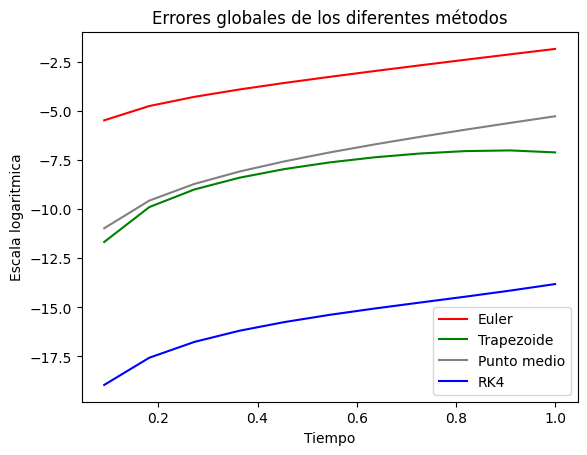

In [14]:
plt.plot(t, err_euler, color = 'red', label = 'Euler')
plt.plot(t, err_trap, color = 'green', label = 'Trapezoide')
plt.plot(t, err_pM, color = 'gray', label = "Punto medio")
plt.plot(t, err_RK4, color = 'blue', label = "RK4")

plt.title("Errores globales de los diferentes métodos")
plt.ylabel("Escala logaritmica")
plt.xlabel("Tiempo")
plt.legend()
plt.show()